<a href="https://colab.research.google.com/github/Meghanah97/Individual-project-hotel-booking-analysis/blob/main/Individual_project_hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly 
import plotly.express as px


In [2]:
hotel_df=pd.read_csv('/content/Hotel Bookings.csv')

In [3]:
hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
 #looking into a brief summary of dataframe

hotel_df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
num_of_rows = hotel_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

Total no. of rows: 119390


In [7]:
# exploring the columns of the dataframe

hotel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:

# unique values in each column of the dataframe
print(hotel_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

In [9]:
hotel_df.drop_duplicates(inplace = True)
num_of_rows = hotel_df.shape[0]
num_of_rows

87396

In [10]:
miss_values = hotel_df.isnull().sum().sort_values(ascending=False)[:4]
miss_values

company     82137
agent       12193
country       452
children        4
dtype: int64

In [11]:
percentage_of_missing_values = miss_values.get(key='company')/num_of_rows*100
percentage_of_missing_values

93.98256213098998

In [12]:
hotel_df.drop(['company'], axis=1, inplace=True)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
percentage_of_missing_values = miss_values.get(key='agent')/num_of_rows*100
percentage_of_missing_values

13.951439425145315

In [14]:
hotel_df['agent'].fillna(value = hotel_df.agent.mode()[0], inplace=True)
hotel_df.agent.isnull().sum()

0

In [15]:

percentage_of_missing_values = miss_values.get(key='children')/num_of_rows*100
percentage_of_missing_values

0.004576868506567806

In [16]:
hotel_df['children'].fillna(value = 0, inplace=True)

In [17]:
hotel_df.children.isnull().sum()

0

In [18]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [19]:
hotel_df[['children', 'agent']] = hotel_df[['children', 'agent']].astype('int64')

In [20]:
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format='%Y-%m-%d')

In [21]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [22]:
# Adding total stays in nights

hotel_df['total_stays_in_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']


In [23]:
# Adding revenue

hotel_df['revenue'] = hotel_df['total_stays_in_nights'] * hotel_df['adr']


In [24]:
 #Adding total number of guests as column

hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']


In [25]:
# Adding column which shows whether reserved room type is the same as assigned room type

hotel_df['is_reserved_room_type_assigned'] = hotel_df.apply(lambda x: 'same room type assigned' if x['reserved_room_type'] == x['assigned_room_type'] 
                                                                                                   else 'different room type assigned', axis=1)


In [26]:
hotel_df['is_reserved_room_type_assigned'].value_counts()

same room type assigned         74287
different room type assigned    13109
Name: is_reserved_room_type_assigned, dtype: int64

In [27]:
# changing the bool data from int to string for easy representation

hotel_df['is_canceled'] = hotel_df['is_canceled'].replace([1, 0], ['cancelled', 'not cancelled'])
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace([1, 0], ['repeated guest', 'not repeated guest'])
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_in_nights,revenue,total_guests,is_reserved_room_type_assigned
0,Resort Hotel,not cancelled,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,2,same room type assigned
1,Resort Hotel,not cancelled,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,2,same room type assigned
2,Resort Hotel,not cancelled,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,1,different room type assigned
3,Resort Hotel,not cancelled,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,1,same room type assigned
4,Resort Hotel,not cancelled,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,196.0,2,same room type assigned


PROBLEM 1:TYPES OF HOTEL



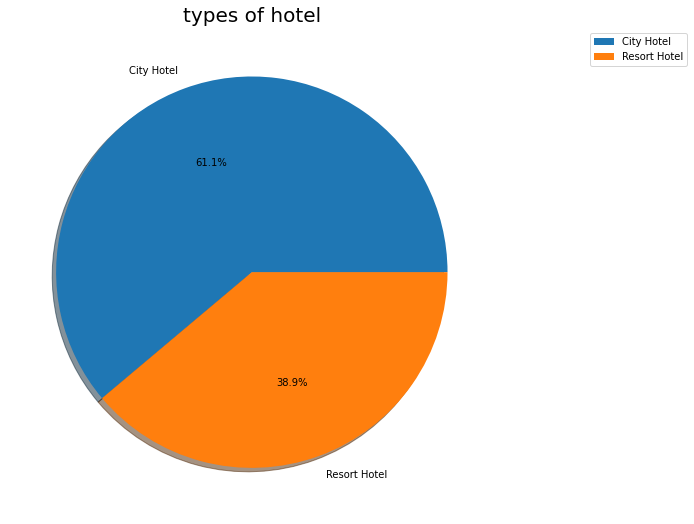

In [28]:
temp = hotel_df['hotel'].value_counts().reset_index()
plt.figure(figsize=(9,9))
ax = plt.subplot(111)
plt.pie(x = temp['hotel'], labels= temp['index'],autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('types of hotel',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

PROBLEM 2:percentage of repeated guests

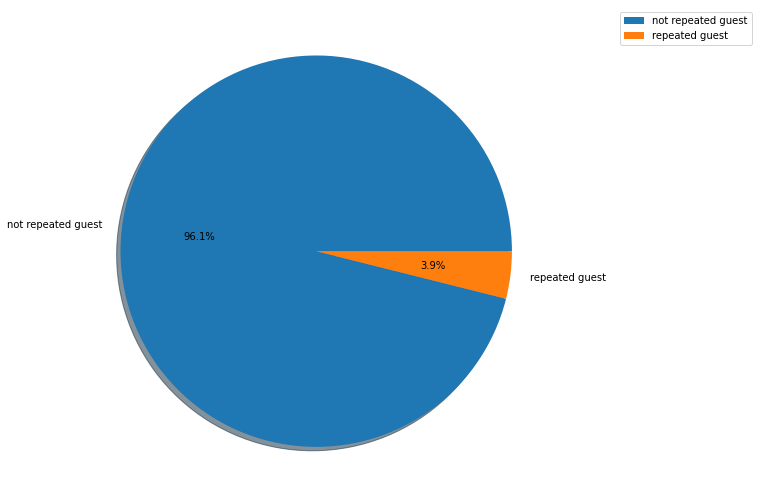

In [29]:
rg=hotel_df['is_repeated_guest'].value_counts()
rg2=hotel_df['is_repeated_guest'].unique()
plt.figure(figsize=(9,9))
ax = plt.subplot(111)
plt.pie(x = rg,labels=rg2,autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()


PROBLEM 3:Market segment

In [30]:
hotel_df['market_segment'].value_counts()


Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

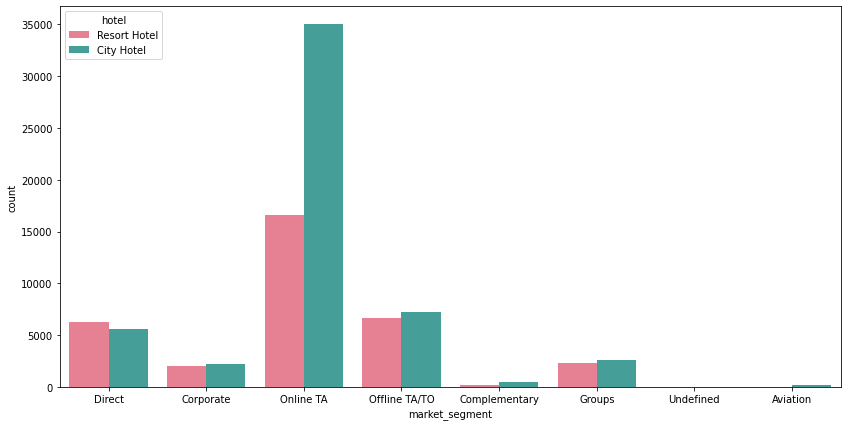

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(x=hotel_df['market_segment'],hue=hotel_df["hotel"], palette='husl')
plt.show()

 problem 4:Distrubution channel

In [32]:
hotel_df['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

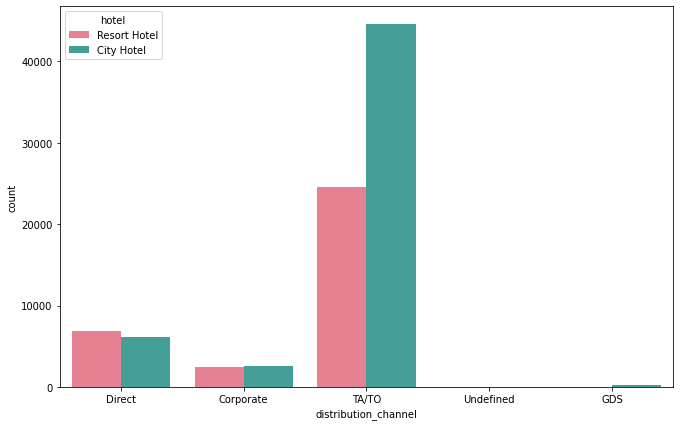

In [33]:
plt.figure(figsize=(11,7))
sns.countplot(x=hotel_df['distribution_channel'],hue=hotel_df["hotel"], palette='husl')
plt.show()

problem5 :room type

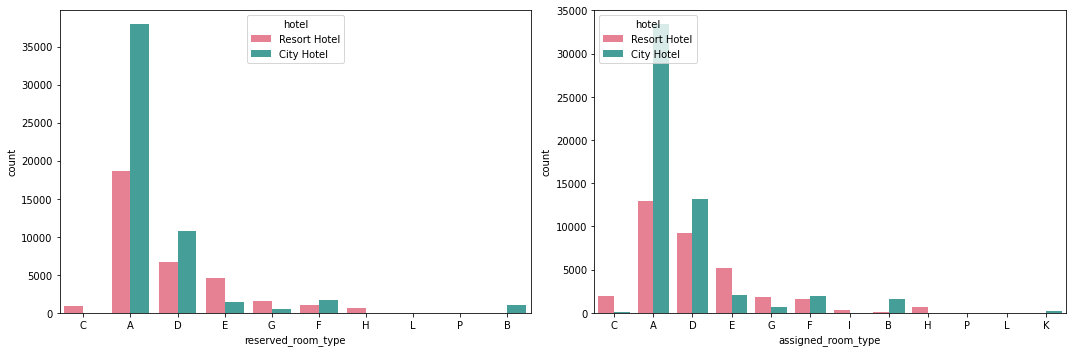

In [34]:
plt.rcParams["figure.figsize"] = [15.00,5.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(x=hotel_df['reserved_room_type'],hue=hotel_df["hotel"], palette='husl',ax=axes[0])
sns.countplot(x=hotel_df['assigned_room_type'],hue=hotel_df["hotel"], palette='husl',ax=axes[1])
plt.show()

problem 6:popular meal packages

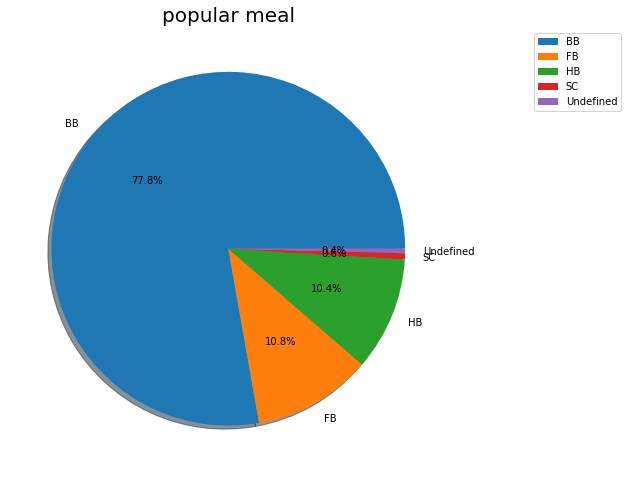

In [35]:
mp1=hotel_df['meal'].value_counts()
mp2=hotel_df['meal'].unique()
plt.figure(figsize=(9,9))
ax = plt.subplot(111)
plt.pie(x = mp1,labels=mp2,autopct= '%1.1f%%',shadow=True)
plt.legend()
plt.title('popular meal',size = 20);
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()


problem 7:customer type

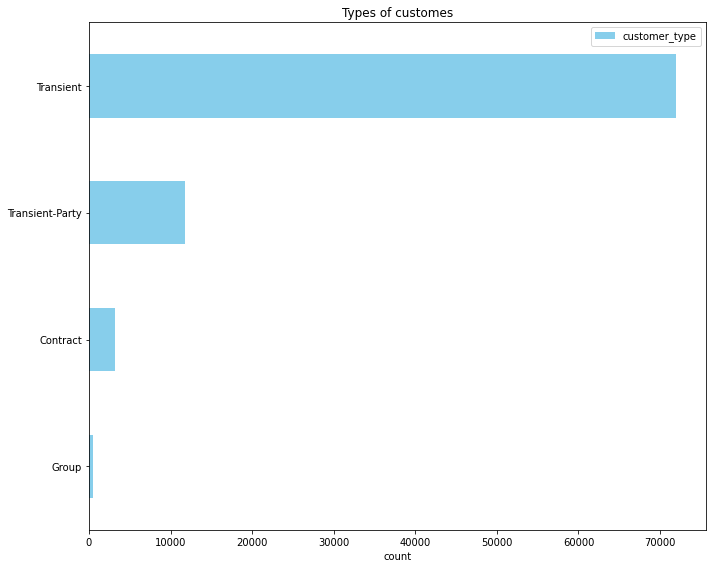

In [36]:
hotel_df.customer_type.value_counts().plot.barh(figsize=(10,8),color='skyblue').invert_yaxis()
plt.title("Types of customes")
plt.xlabel('count')
plt.legend();

problem8:correlation map

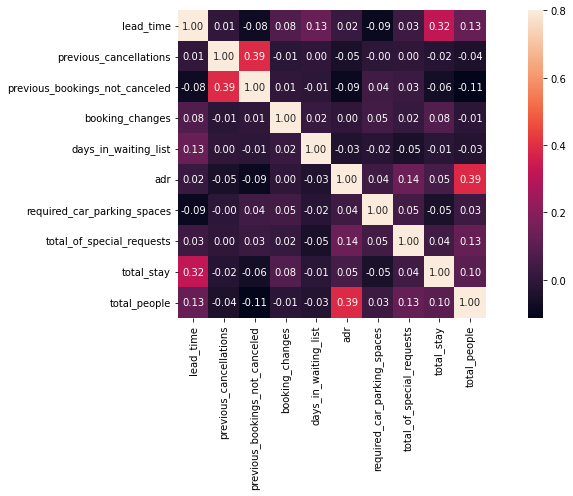

In [37]:
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']
hotel_df1 = hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]
corrmat = hotel_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

problem 9:country

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People from top travelling countries')
plt.show()

NameError: ignored

<Figure size 864x288 with 0 Axes>

problem10:most arrived month

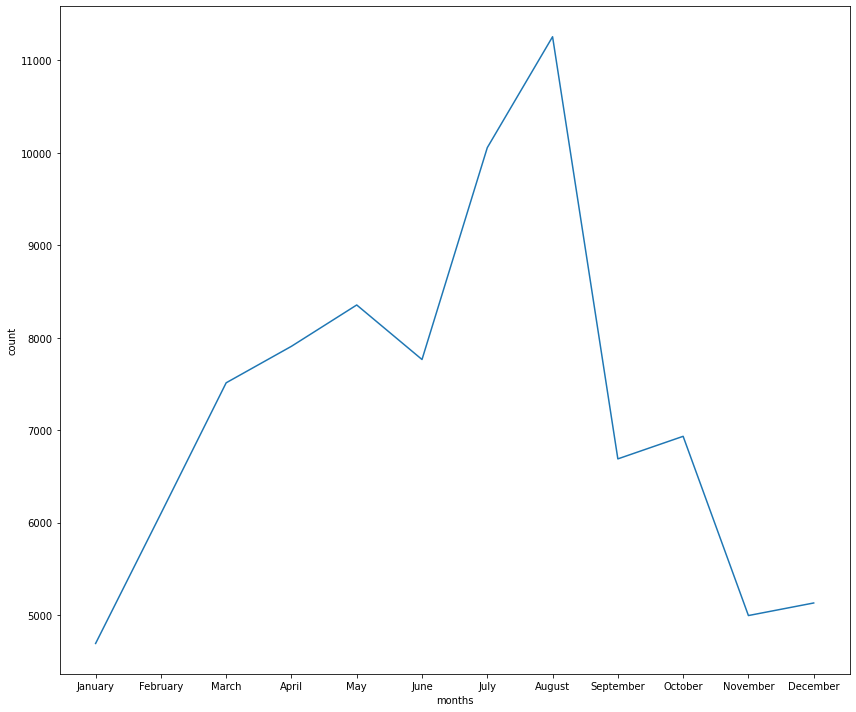

In [39]:

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
adm1=hotel_df['arrival_date_month'].value_counts().reindex(order)
adm2=hotel_df['arrival_date_month'].unique()
plt.figure(figsize=(12, 10))
plt.plot(adm1.index,adm1.values)
plt.xlabel('months')
plt.ylabel('count')
plt.xticks(rotation='horizontal')
plt.show()

problem 11:average daily rate

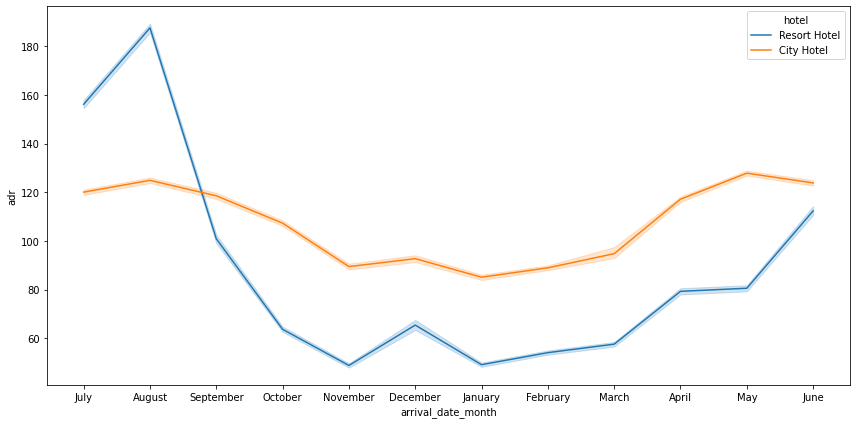

In [40]:

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=hotel_df)
plt.show()

problem 12:number of bookings cancelled when reserved room type is the same and different as the assigned room type

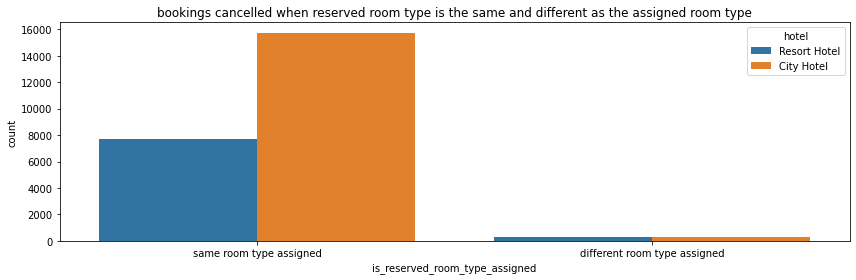

In [41]:
 
x1=hotel_df[hotel_df['is_canceled'] == 'cancelled'].is_reserved_room_type_assigned
plt.figure(figsize=(12,4))
sns.countplot(x=x1,hue ='hotel',data= hotel_df)
plt.title('bookings cancelled when reserved room type is the same and different as the assigned room type')
plt.show()

problem 13:deposit

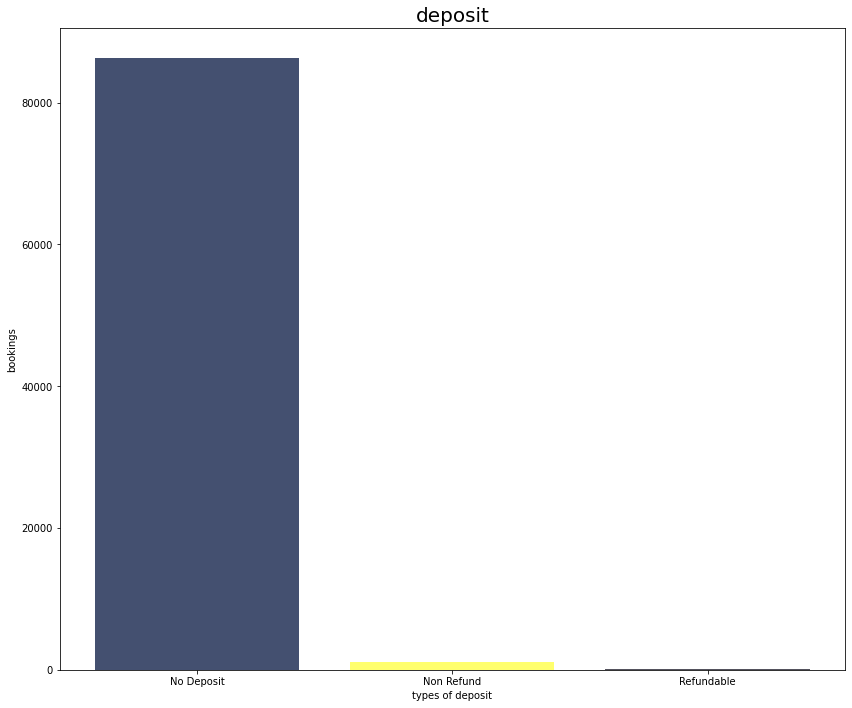

In [42]:
a = hotel_df['deposit_type'].value_counts().index
b = hotel_df['deposit_type'].value_counts()

asis = []
bsis = []
for i in range(len(a)):
    asis.append(a[i])
    bsis.append(b[i])
plt.figure(figsize=(12,10))
plt.bar(asis,bsis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('deposit',size = 20);
sns.set_theme(style="white")
plt.ylabel('bookings');
plt.xlabel('types of deposit');


problem 14:lead time and waiting time

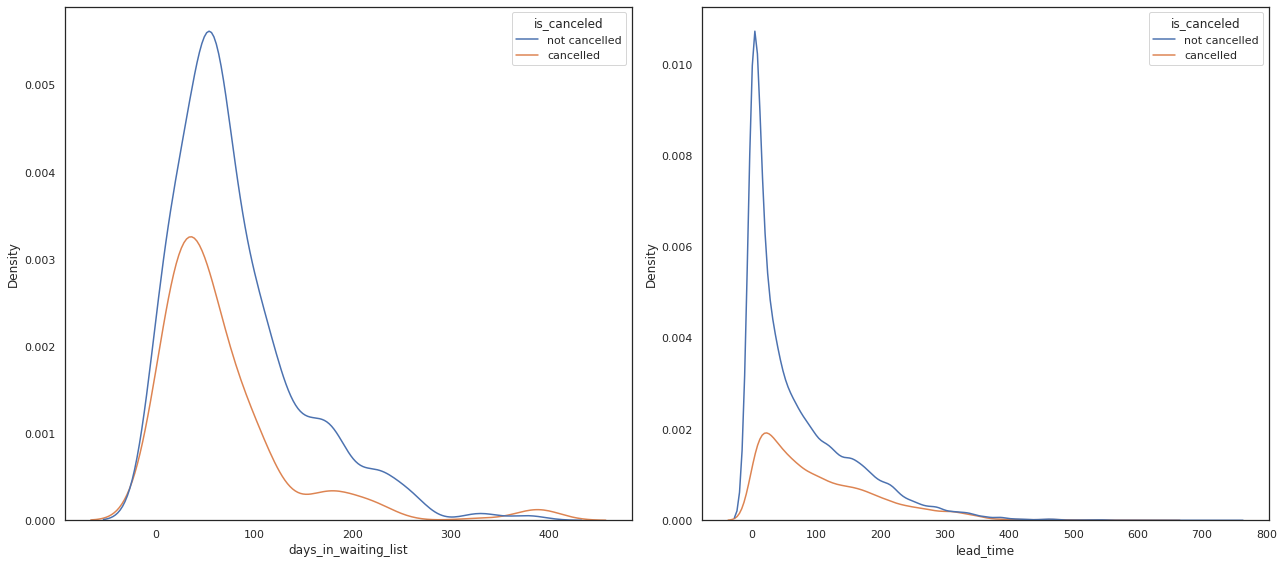

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(data = hotel_df[hotel_df['days_in_waiting_list'] != 0], ax = axes[0], x = 'days_in_waiting_list', hue = 'is_canceled')
sns.kdeplot(data = hotel_df, ax = axes[1], x = 'lead_time', hue = 'is_canceled')
plt.show()

problem 15

In [44]:
temp = hotel_df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()